# Final Project
Comparing two ways of allocating a two-stock portfolio

## Setup

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Manifest.toml`
  Activating project at `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Manifest.toml`


## Prerequisites: Load historical dataset, compute expected returns and get 2023 `SPY` data
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) since `01-03-2018` until `12-01-2023`, along with data for a few exchange traded funds and volatility products during that time. 

In [2]:
original_dataset = load(joinpath(_PATH_TO_DATA, 
        "SP500-Daily-OHLC-1-3-2018-to-12-01-2023.jld2")) |> x-> x["dataset"];

### Clean the data
Not all of the tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquistion or de-listing events. Let's collect only those tickers with the maximum number of trading days.

* First, let's compute the number of records for a company that we know has a maximim value, e.g., `AAPL` and save that value in the `maximum_number_trading_days` variable:

In [3]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow;

Now, lets iterate through our data and collect only those tickers that have `maximum_number_trading_days` records. Save that data in the `dataset::Dict{String,DataFrame}` variable:

In [4]:
dataset = Dict{String,DataFrame}();
for (ticker,data) ∈ original_dataset
    if (nrow(data) == maximum_number_trading_days)
        dataset[ticker] = data;
    end
end
dataset;

Let's get a list of firms that we have in cleaned up `dataset`, and save it in the `all_tickers` array:

In [5]:
all_tickers = keys(dataset) |> collect |> sort;
K = length(all_tickers);

### Get the 2023 `SPY` data

In [6]:
startdate = Date(2023,01,03);
SPY_dataset = dataset["SPY"];
SPY_df = filter(:timestamp => x-> x >= startdate, SPY_dataset);

### Compute the expected return for all firms in the dataset
The expected return $\mathbb{E}(r_{i})$ and covariance matrix $\Sigma$ will be used in our calculations, so we'll provide values for both of these items for the entire data set (all `N = 459` tickers), and then you can pick out which tickers you are interested in. 

* First, we compute the expected (annualized) log return by passing the `dataset` and the entire list of firms we have in the dataset (held in the $N\times{1}$ `all_array` array) to the `log_return_matrix(...)` method. The result is stored in the `all_firms_return_matrix` variable, a $T-1\times{N}$ array of log return values. Each row of `all_firms_return_matrix` corresponds to a time-value, while each column corresponds to a firm:

In [7]:
all_firms_return_matrix = log_return_matrix(dataset, all_tickers, 
    Δt = (1.0/252.0), risk_free_rate = 0.0);

## Your project starts here ....

In [8]:
## Checkpoint 1, Minimum Goal: separate the data into a set that will be calculated upon and a set
## that will be tested on.

In [9]:
first_dataset = Dict{String,DataFrame}(); #Dataset from 2018-2022
test_dataset = Dict{String,DataFrame}();  #Dataset for 2023

for (ticker,data) ∈ dataset
    first_data = first(dataset[ticker],1258) #The first 1258 rows have data for 2018-2022
    first_dataset[ticker] = first_data
    
    test_data = last(dataset[ticker],231)    #The last 231 rows have data for 2023
    test_dataset[ticker] = test_data
end

In [10]:
first_dataset["GOOG"] #Check data was split properly

Row,volume,volume_weighted_average_price,open,close,high,low,timestamp,number_of_transactions
,Float64,Float64,Float64,Float64,Float64,Float64,DateTime,Int64
1,2.86034e7,53.8841,53.2155,54.124,54.3145,53.1605,2018-01-03T05:00:00,28757
2,2.00921e7,54.3944,54.4,54.32,54.6785,54.2001,2018-01-04T05:00:00,22929
3,2.55825e7,55.0016,54.7,55.1115,55.2125,54.6,2018-01-05T05:00:00,26393
4,2.09521e7,55.3607,55.1115,55.347,55.5635,55.081,2018-01-08T05:00:00,20075
5,1.80508e7,55.3203,55.47,55.313,55.5285,55.0615,2018-01-09T05:00:00,22842
6,2.08559e7,54.9986,54.855,55.1305,55.23,54.8055,2018-01-10T05:00:00,22443
7,1.95658e7,55.1325,55.315,55.276,55.3263,54.9795,2018-01-11T05:00:00,21498
8,3.44107e7,55.8969,55.1205,56.113,56.2145,55.0575,2018-01-12T05:00:00,32883
9,3.15052e7,56.3555,56.6255,56.088,56.9955,55.8916,2018-01-16T05:00:00,34737


In [11]:
test_dataset["GOOG"]

Row,volume,volume_weighted_average_price,open,close,high,low,timestamp,number_of_transactions
,Float64,Float64,Float64,Float64,Float64,Float64,DateTime,Int64
1,2.07385e7,89.829,89.83,89.7,91.55,89.02,2023-01-03T05:00:00,202679
2,2.70465e7,88.839,91.01,88.71,91.24,87.8,2023-01-04T05:00:00,264218
3,2.31361e7,87.2171,88.07,86.77,88.21,86.56,2023-01-05T05:00:00,219917
4,2.66126e7,87.3153,87.36,88.16,88.47,85.57,2023-01-06T05:00:00,278483
5,2.29967e7,89.6818,89.195,88.8,90.83,88.58,2023-01-09T05:00:00,209291
6,2.28556e7,88.6725,86.72,89.24,89.475,86.7,2023-01-10T05:00:00,196156
7,2.59988e7,91.5908,90.06,92.26,92.45,89.74,2023-01-11T05:00:00,192588
8,2.27542e7,91.9126,92.4,91.91,92.62,90.57,2023-01-12T05:00:00,220534
9,1.86307e7,92.1065,91.528,92.8,92.98,90.93,2023-01-13T05:00:00,163892


In [12]:
#dataset["GOOG"]

In [13]:
##Choose two random S&P 500 stocks, say Tesla and Google.
firms = ["TSLA", "GOOG"]

2-element Vector{String}:
 "TSLA"
 "GOOG"

In [14]:
return_matrix = log_return_matrix(first_dataset, firms);
return_matrix

1257×2 Matrix{Float64}:
  -5.4556      2.37529
   2.10336     2.79747
  12.7027      1.63994
   1.7449     -0.183967
   0.281913   -1.46971
   4.70935     0.612775
  -3.04807     3.46992
   2.87698     2.05907
   4.15097    -0.157897
   1.88851     0.17936
  -0.894568    1.64984
   4.87541     4.10985
   0.618696    2.95003
   ⋮         
  -8.87577    -2.87171
  -0.872248  -11.5673
  -8.93193    -1.91187
  -2.5799     -3.10077
 -13.5072     -1.35479
  -7.12506     2.5833
 -20.7481     -6.19132
  -7.67645     3.90996
 -22.2524     -3.3226
  -3.35445    -3.36497
  18.6703      4.84602
   3.2815     -1.99968

In [15]:
covariance_matrix = cov(return_matrix);
covariance_matrix = covariance_matrix * 1/252

2×2 Matrix{Float64}:
 0.323695   0.0588939
 0.0588939  0.0675776

In [16]:
expected_return = mean(return_matrix, dims=1) |> vec;
expected_return

2-element Vector{Float64}:
 0.3502356886257353
 0.09834078241619261

In [17]:
number_of_firms = length(firms);
initial = zeros(number_of_firms);
initial[1] = 1.0;
bounds = zeros(number_of_firms,2);
bounds[:,2] .= 1.0;
risk_free_rate = 0.045
number_of_points = 20;

In [18]:
problem_risk = build(MyMarkowitzRiskyAssetOnlyPortfiolioChoiceProblem, (
    Σ = covariance_matrix,
    μ = expected_return,
    bounds = bounds,
    initial = initial,
    R = 0.0
));

In [19]:
minimum_desired_reward_array = range(risk_free_rate, stop = 10*risk_free_rate, length = number_of_points) |> collect;
minimum_desired_reward_array

20-element Vector{Float64}:
 0.045
 0.0663157894736842
 0.08763157894736842
 0.10894736842105263
 0.13026315789473683
 0.15157894736842104
 0.17289473684210524
 0.19421052631578944
 0.21552631578947368
 0.23684210526315788
 0.2581578947368421
 0.27947368421052626
 0.3007894736842105
 0.32210526315789473
 0.3434210526315789
 0.36473684210526314
 0.3860526315789473
 0.40736842105263155
 0.4286842105263157
 0.44999999999999996

In [20]:
#Checkpoint 2, Expected goal: Find the portfolio allocation of the two stocks for an expected 20% return

In [21]:
efficient_frontier = Dict{Float64,Float64}();
for i ∈ eachindex(minimum_desired_reward_array)
    
    # update the problem object -
    problem_risk.R = minimum_desired_reward_array[i];
    
    # compute -
    solution = solve(problem_risk)

    # check: did this converge?
    status_flag = solution["status"];    
    if (status_flag == MathOptInterface.LOCALLY_SOLVED)
        key = sqrt(solution["objective_value"]);
        value = solution["reward"];
        efficient_frontier[key] = value;
    end
end

In [22]:
efficient_frontier

Dict{Float64, Float64} with 15 entries:
  0.264138 => 0.130263
  0.259483 => 0.108947
  0.34451  => 0.215526
  0.556388 => 0.343421
  0.517651 => 0.322105
  0.408224 => 0.258158
  0.259426 => 0.106339
  0.293929 => 0.172895
  0.375112 => 0.236842
  0.275905 => 0.151579
  0.479869 => 0.300789
  0.259426 => 0.106339
  0.317147 => 0.194211
  0.259426 => 0.106339
  0.443286 => 0.279474

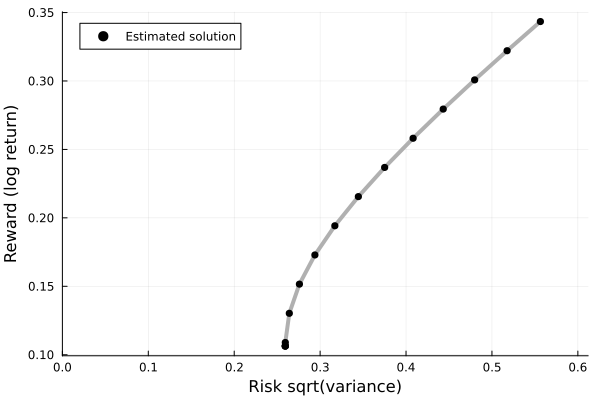

In [23]:
plot(efficient_frontier, lw=4, xlabel="Risk sqrt(variance)", 
    ylabel="Reward (log return)", fontsize=18, label="", c=:gray69, 
    xlim=(0.0, 1.1*maximum(efficient_frontier).first))
scatter!(efficient_frontier, label="Estimated solution", c=:black)

In [24]:
problem_risk.R = 0.20;
solution_riskonly = solve(problem_risk)

Dict{String, Any} with 4 entries:
  "argmax"          => [0.403578, 0.596422]
  "reward"          => 0.2
  "status"          => LOCALLY_SOLVED
  "objective_value" => 0.105112

In [25]:
w_opt = solution_riskonly["argmax"];
idx = findall(x-> abs(x)>0.001, w_opt)
[firms[idx] w_opt[idx]]

2×2 Matrix{Any}:
 "TSLA"  0.403578
 "GOOG"  0.596422

In [26]:
problem_risk_free = build(MyMarkowitzRiskyRiskFreePortfiolioChoiceProblem, (
    Σ = covariance_matrix,
    μ = expected_return,
    bounds = bounds,
    initial = initial,
    risk_free_rate = risk_free_rate,
    R = 0.0
));

In [27]:
capital_allocation_line = Dict{Float64,Float64}();
for i ∈ eachindex(minimum_desired_reward_array)
    
    # update the problem object -
    problem_risk_free.R = minimum_desired_reward_array[i];
    
    # compute -
    solution_risk_free = solve(problem_risk_free)

    # check: did this converge?
    status_flag = solution_risk_free["status"];    
    if (status_flag == MathOptInterface.LOCALLY_SOLVED)
        key = sqrt(solution_risk_free["objective_value"]);
        value = solution_risk_free["reward"];
        capital_allocation_line[key] = value;
    end
end
capital_allocation_line

Dict{Float64, Float64} with 17 entries:
  0.0794629  => 0.0876316
  0.437046   => 0.279474
  0.600592   => 0.364737
  0.476777   => 0.300789
  0.397314   => 0.258158
  0.55624    => 0.343421
  0.119194   => 0.108947
  0.238389   => 0.172895
  0.158926   => 0.130263
  0.317851   => 0.215526
  0.27812    => 0.194211
  6.58555e-5 => 0.0450293
  0.357583   => 0.236842
  0.658222   => 0.386053
  0.0397314  => 0.0663158
  0.516509   => 0.322105
  0.198657   => 0.151579

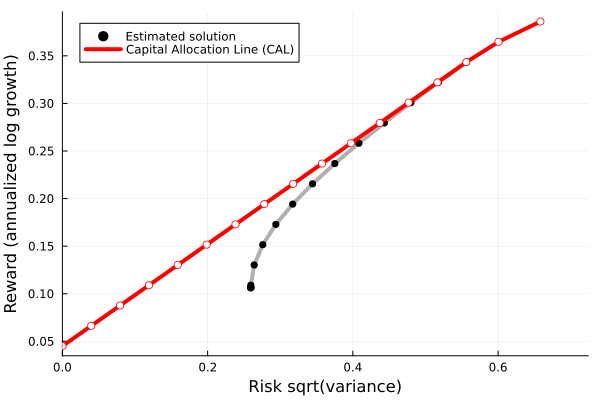

In [28]:
plot!(capital_allocation_line, lw=4, xlabel="Risk sqrt(variance)", 
    ylabel="Reward (annualized log growth)", fontsize=18, c=:red, 
    xlim=(0.0, 1.1*maximum(capital_allocation_line).first), label="Capital Allocation Line (CAL)")
scatter!(capital_allocation_line, label="", msc=:red, mc=:white)

In [29]:
problem_risk_free.R = 0.20;
solution_risk_free = solve(problem_risk_free)

Dict{String, Any} with 4 entries:
  "argmax"          => [0.507804, 1.10891e-6]
  "reward"          => 0.2
  "status"          => LOCALLY_SOLVED
  "objective_value" => 0.0834697

In [30]:
w_opt = solution_risk_free["argmax"];
idx = findall(x-> abs(x)>0.01, w_opt)
[firms[idx] w_opt[idx]]

1×2 Matrix{Any}:
 "TSLA"  0.507804

In [31]:
mean(return_matrix[:,1]) #TSLA mean return

0.3502356886257353

In [32]:
mean(return_matrix[:,2]) #GOOG mean return

0.09834078241619261

In [33]:
#Standardize so exponents = 1
0.3502356886257353/(0.3502356886257353 + 0.09834078241619261)

0.7807714207841258

In [34]:
# In the other folder, using a Cobb-Douglas Choice Problem, we found another possible 2 stock portfolio
# allocation. We found the optimal allocation to maximize our utility (our projected return) was to buy
# 71.2 shares of TSLA and 24.5 shares of GOOG.

Checkpoint 4, Stretch Goal Continued: Find the outcomes of the two portfolios using the 2023 data.

In [44]:
tsla_2023 = test_dataset["TSLA"]
goog_2023 = test_dataset["GOOG"]

tsla_return = (tsla_2023.volume_weighted_average_price[end] - tsla_2023.volume_weighted_average_price[1])/(tsla_2023.volume_weighted_average_price[1])
goog_return = (goog_2023.volume_weighted_average_price[end] - goog_2023.volume_weighted_average_price[1])/(goog_2023.volume_weighted_average_price[1])

tsla_std = std(tsla_2023.volume_weighted_average_price)
goog_std = std(goog_2023.volume_weighted_average_price)

16.212924418260773

In [41]:
#Markowitz Sharpe Ratio
initial_tsla_shares_M = 4000/tsla_2023.volume_weighted_average_price[1]
initial_goog_shares_M = 6000/goog_2023.volume_weighted_average_price[1]

tsla_stock_change = tsla_2023.volume_weighted_average_price[end] - tsla_2023.volume_weighted_average_price[1]
goog_stock_change = goog_2023.volume_weighted_average_price[end] - goog_2023.volume_weighted_average_price[1]


markowitz_portfolio_std = std((initial_tsla_shares_M * tsla_2023.volume_weighted_average_price) .+ (initial_goog_shares_M * goog_2023.volume_weighted_average_price))
markowitz_portfolio_return_val = (initial_tsla_shares_M * tsla_stock_change) + (initial_goog_shares_M * goog_stock_change)
risk_free_return_val = 10000*0.042

sharpe_ratio_markowitz = (markowitz_portfolio_return_val - risk_free_return_val)/markowitz_portfolio_std

2.859121961728535

In [49]:
markowitz_portfolio_std

2482.521043632329

In [42]:
#Cobb_Douglas Sharpe Ratio
initial_tsla_shares_CD = 7123.287/tsla_2023.volume_weighted_average_price[1]
initial_goog_shares_CD = 2449.888/goog_2023.volume_weighted_average_price[1]

tsla_stock_change = tsla_2023.volume_weighted_average_price[end] - tsla_2023.volume_weighted_average_price[1]
goog_stock_change = goog_2023.volume_weighted_average_price[end] - goog_2023.volume_weighted_average_price[1]


CD_portfolio_std = std((initial_tsla_shares_CD * tsla_2023.volume_weighted_average_price) .+ (initial_goog_shares_CD * goog_2023.volume_weighted_average_price))
CD_portfolio_return_val = (initial_tsla_shares_CD * tsla_stock_change) + (initial_goog_shares_CD * goog_stock_change)
risk_free_return_val = 10000*0.042
sharpe_ratio_CD = (CD_portfolio_return_val - risk_free_return_val)/CD_portfolio_std

2.8813061490849026

In [50]:
CD_portfolio_std

3128.8581507574704

));## Disclaimer and Risks
__This content is offered solely for training and  informational purposes__. No offer or solicitation to buy or sell securities or derivative products, or any investment or trading advice or strategy,  is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on your evaluation of your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.